<a href="https://colab.research.google.com/github/fwu27/bitcoin-prices/blob/main/bitcoin_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bitcoin_price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
df.shape

(3392, 6)

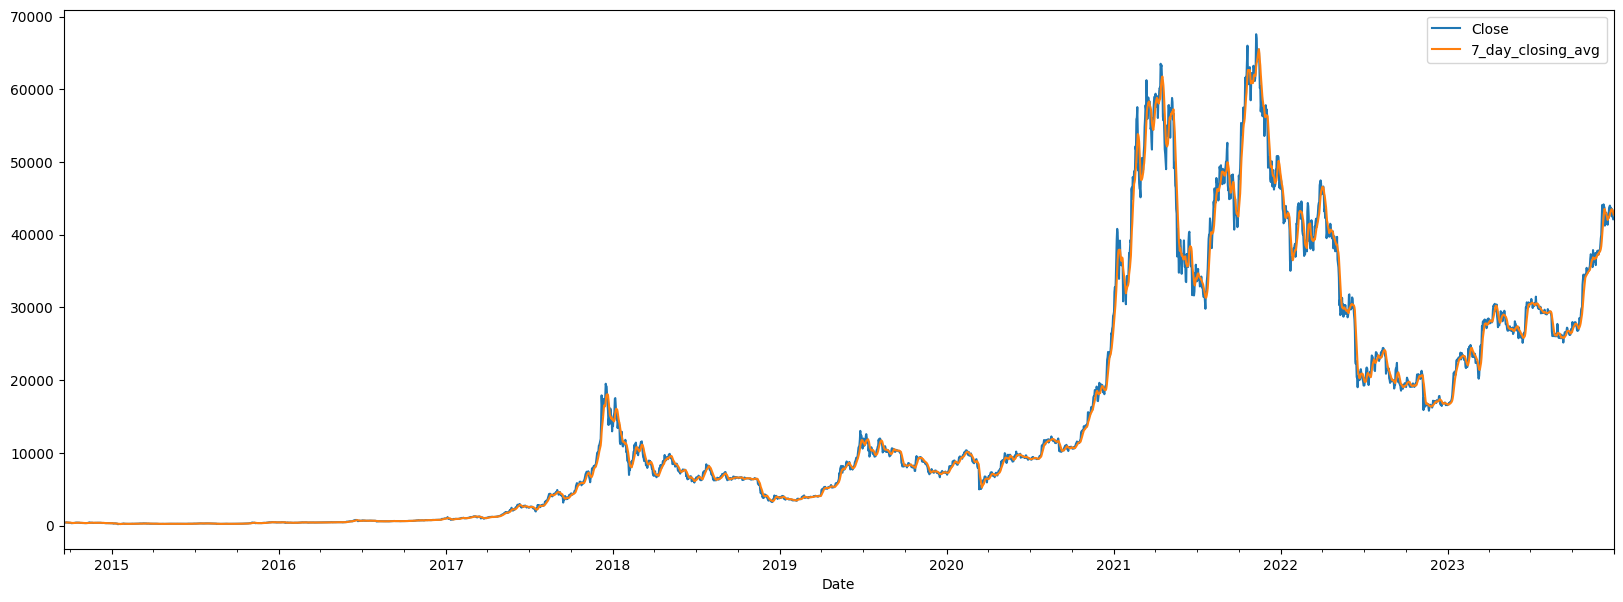

In [24]:
df['7_day_closing_avg'] = df['Close'].rolling(window = 7).mean()
df[['Close', '7_day_closing_avg']].plot(figsize=(20,7))
plt.show()

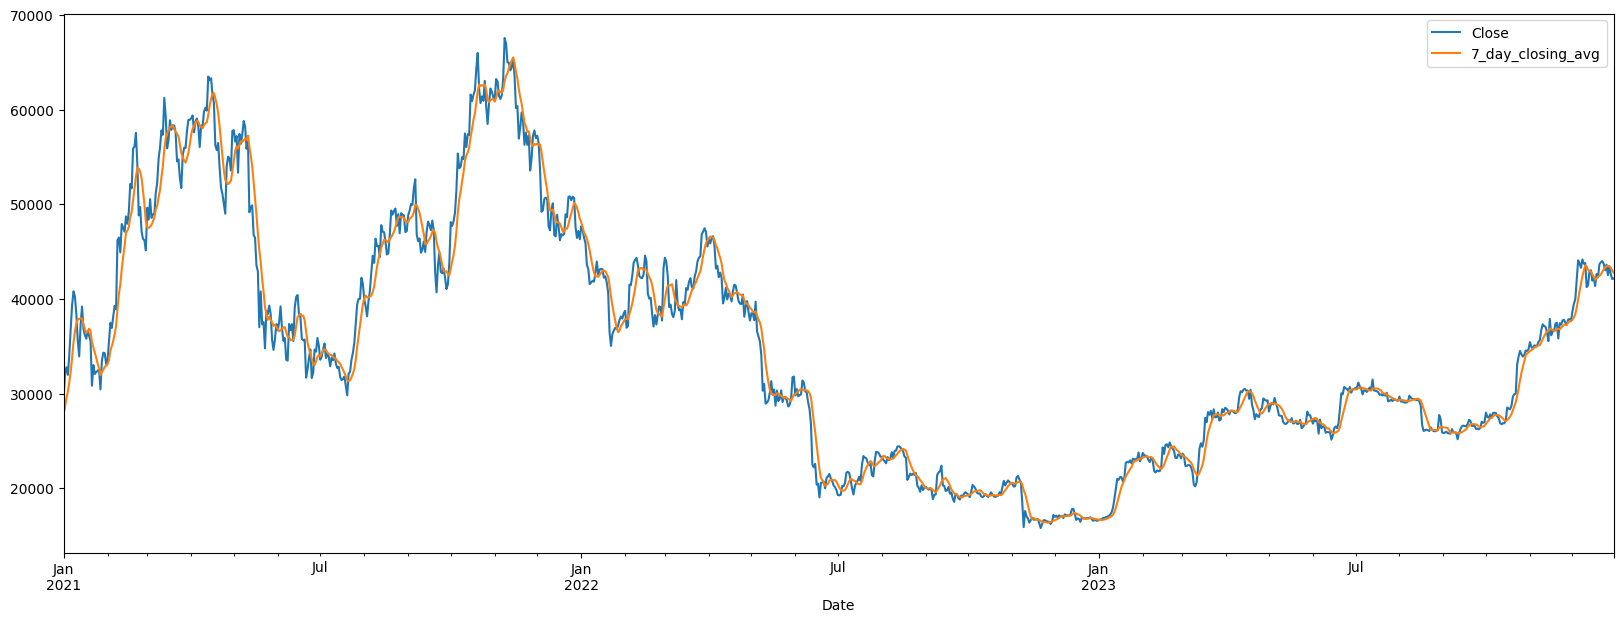

In [29]:
df[['Close', '7_day_closing_avg']].loc['2021':'2023'].plot(figsize=(20,7))
plt.show()

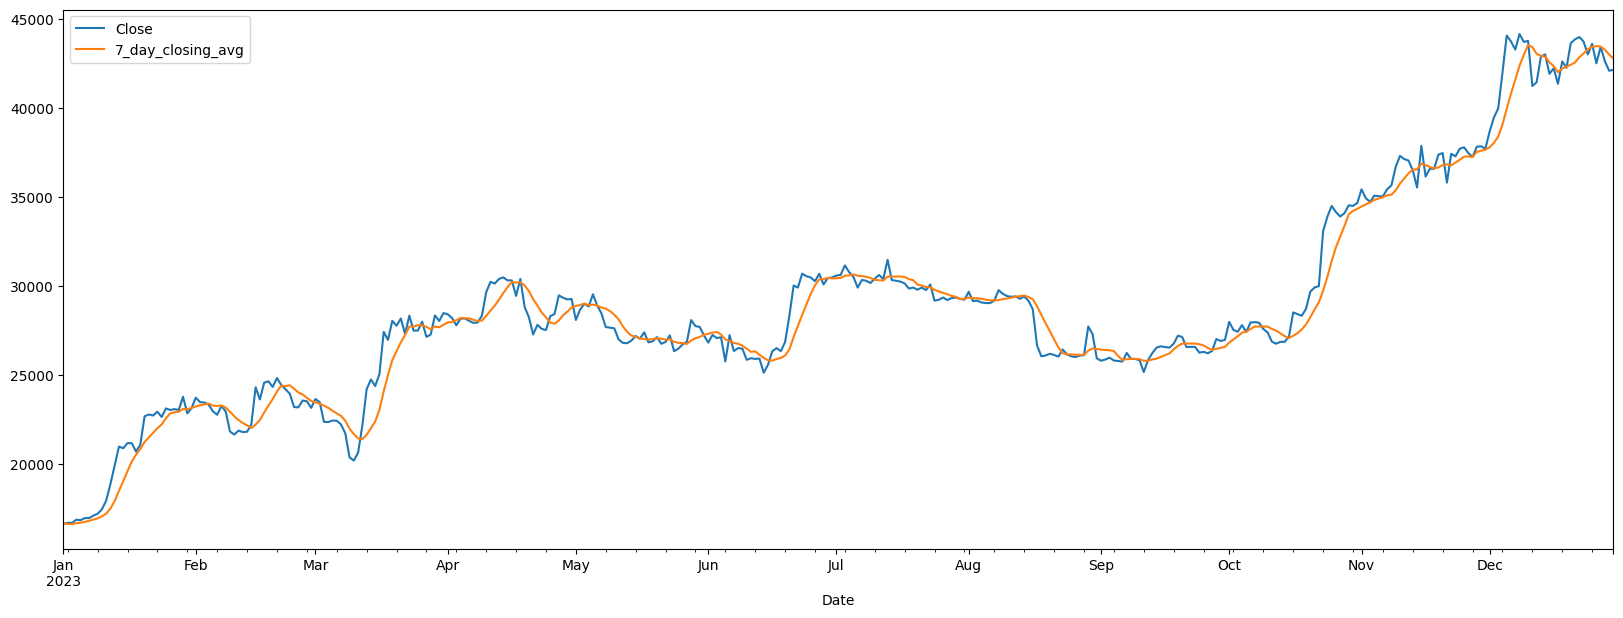

In [28]:
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize=(20,7))
plt.show()

In [23]:
df.resample('ME').max()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')